In [1]:
#Student ID and name: Ndiame Ndiaye (260744987)
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

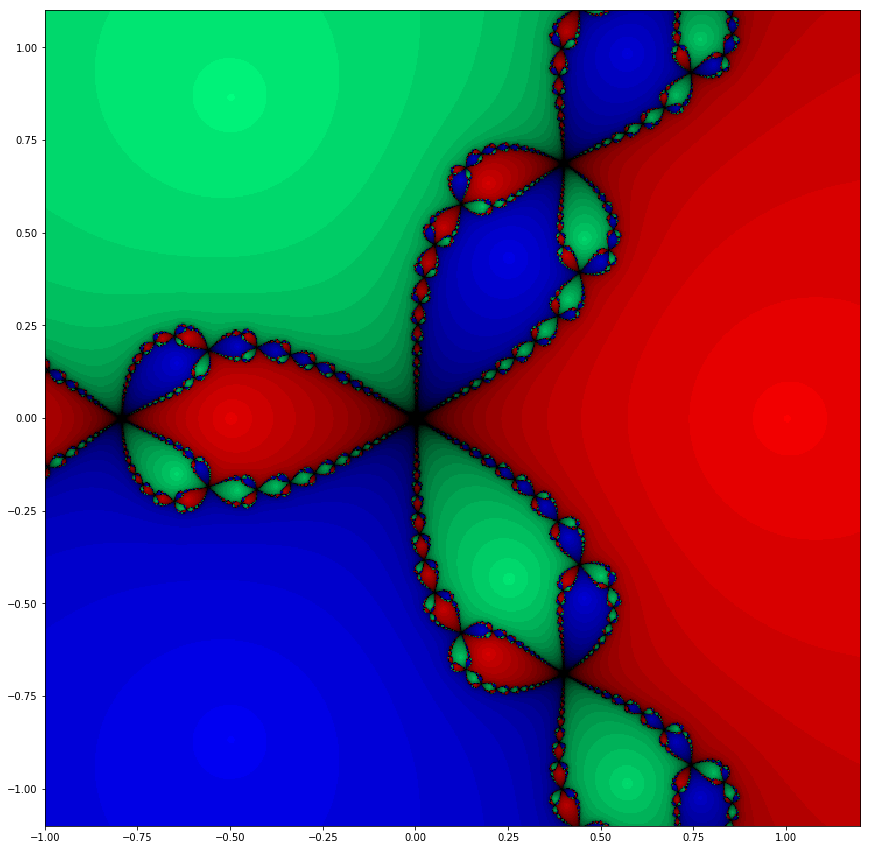

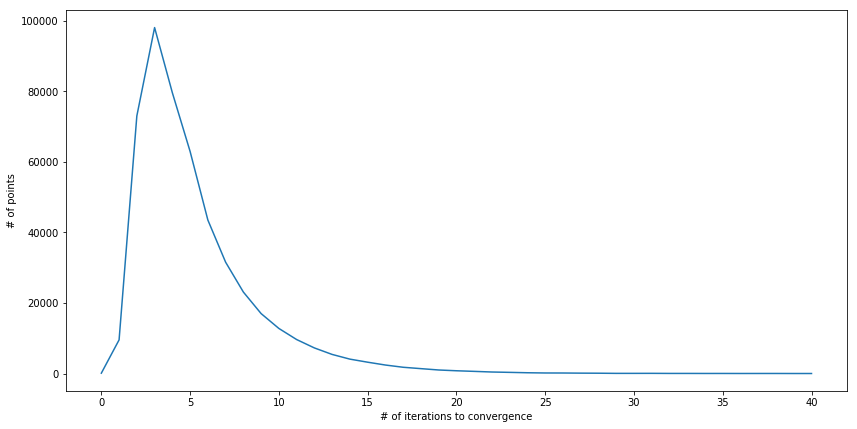

In [3]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Note that the following graph isn't centered at (0,0) so we can see the fractal nature of the graph.

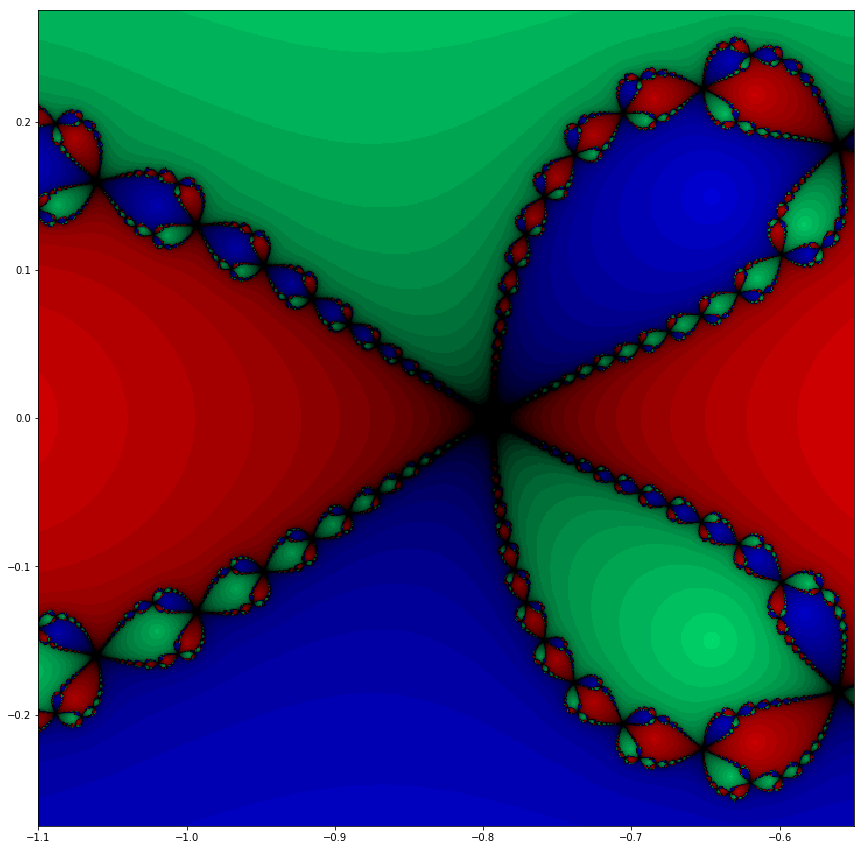

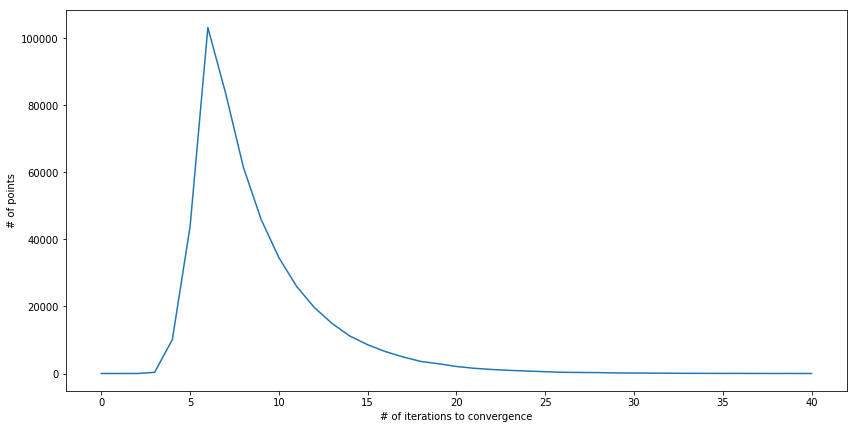

In [4]:
xmin = -1.1
xmax = -0.55
ymin = -0.275
ymax = 0.275
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtZoom.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

There is a large monochromatic region around each root because whenever we are close to some root, each iteration will always get us closer to that root. Since the iteration brings us closer to that root we always get the same root for a large region around it.

The fractal nature of the boundary is obtained because we are far from all 3 roots and the tangent line will lead us to a point close to (0,0). This motive will mimic the motice at (0,0) and this occurs regularly when we're in between 2 roots.

Take the function 
$$f(x)=x^5-2$$
which has the following 5 roots: 
$$2^{ \frac{1}{5} }*e^{i\frac{2\pi}{5}}$$ with i=0...4

The iteration map for this function is: $$\phi(z)=z-\frac{x^5-2}{5z^4}$$

In [5]:
#Newton-Raphson iteration for z^5-2=0
def phi2(z):
    z=complex(z)
    return z+(2/(z*z*z*z)-z)/5
#roots:
zz=[np.power(2,1/5),np.power(2,1/5)*complex(np.cos(2*np.pi/5),np.sin(2*np.pi/5)),np.power(2,1/5)*complex(np.cos(4*np.pi/5),np.sin(4*np.pi/5)),np.power(2,1/5)*complex(np.cos(6*np.pi/5),np.sin(6*np.pi/5)),np.power(2,1/5)*complex(np.cos(8*np.pi/5),np.sin(8*np.pi/5))]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1]]

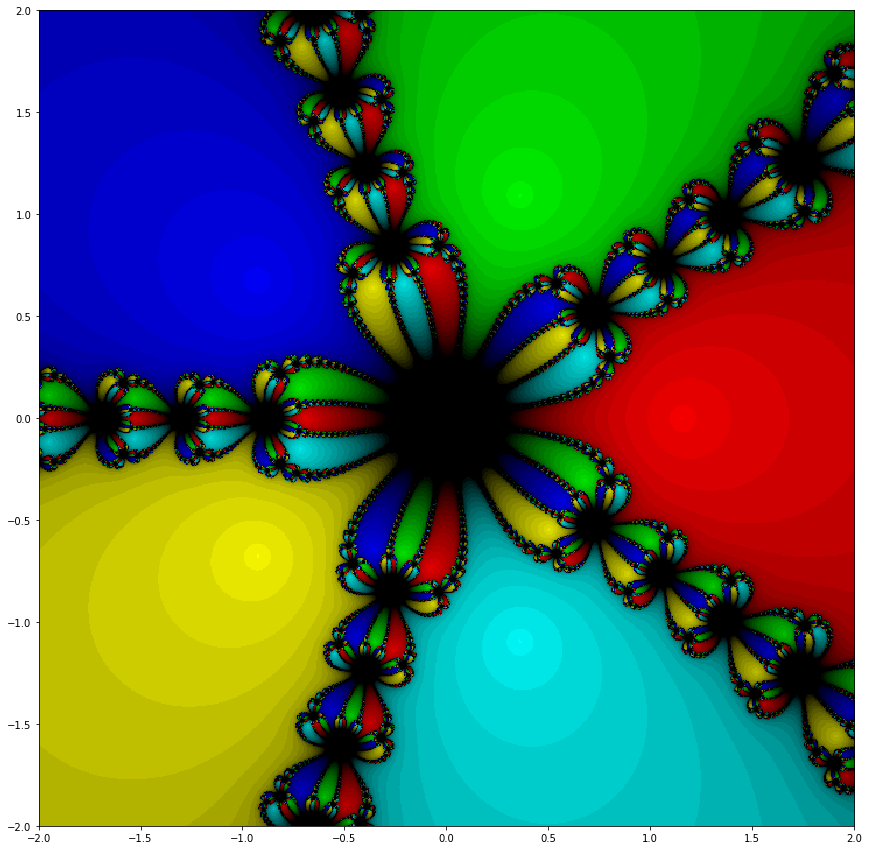

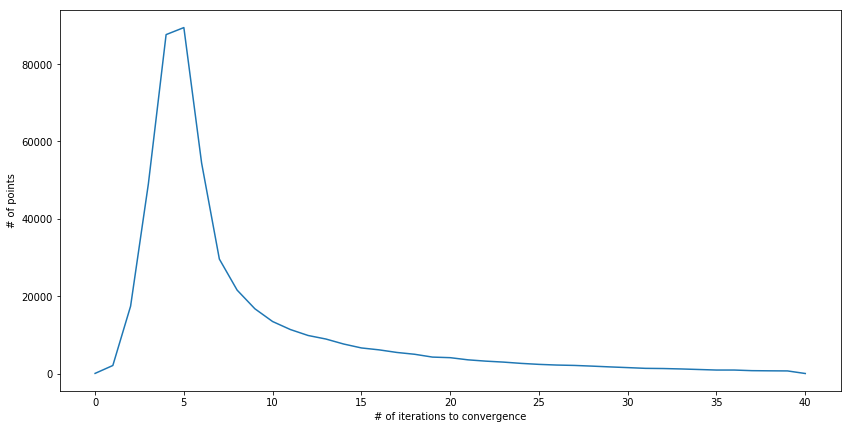

In [6]:
xmin = -2
xmax = 2
ymin = -2
ymax = 2
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi2(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtSecondFun.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Note that with the previous graph we see that for the chosen polynomial there are many bad first estimates where we can't converge to one of the 5 roots.

In [7]:
#Stephenson iteration for z**3-1=0, k is omega
def phi3(z,k):
    z=complex(z)
    return z-(k*np.power((np.power(z,3)-1),2)/(np.power(z+k*(np.power(z,3)-1),3)-np.power(z,3)))
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

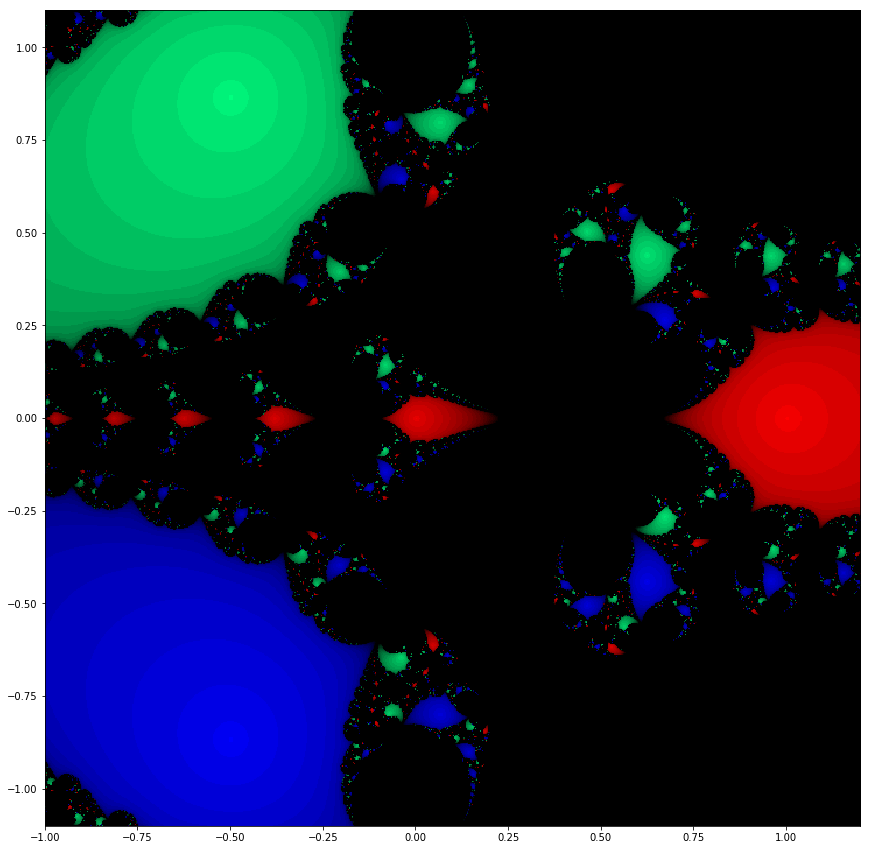

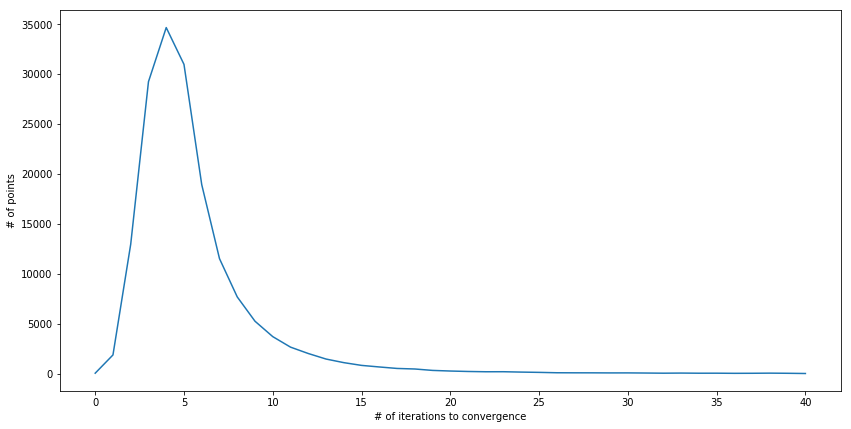

In [8]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi3(z0,1)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtSteffensen1.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

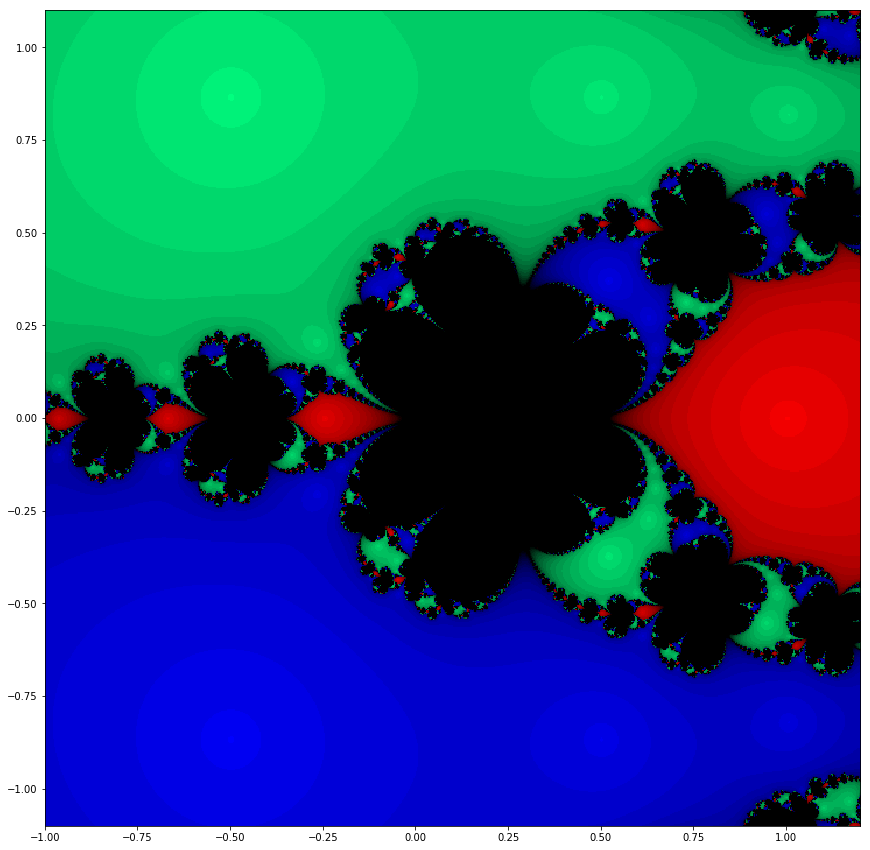

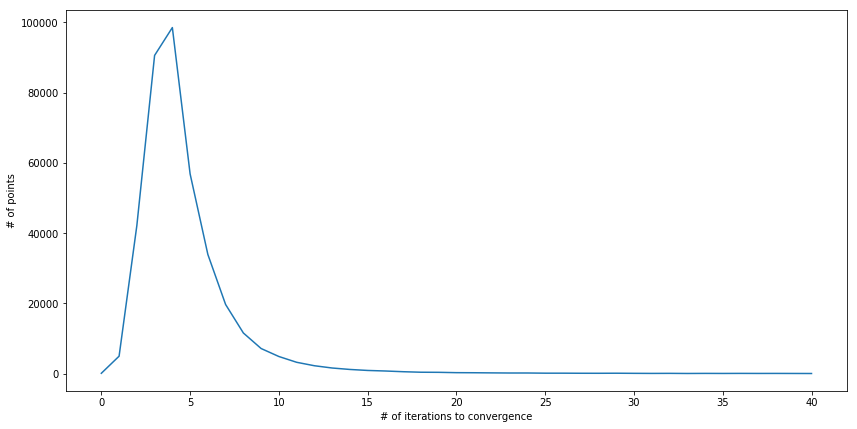

In [9]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi3(z0,.5)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtSteffensenhalf.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

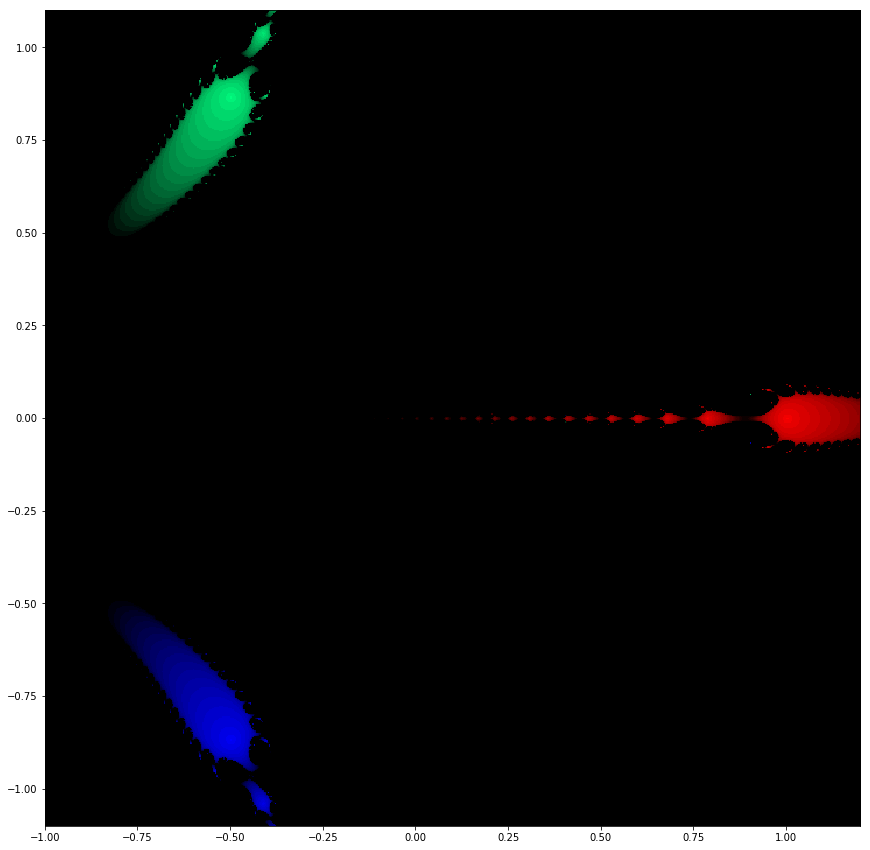

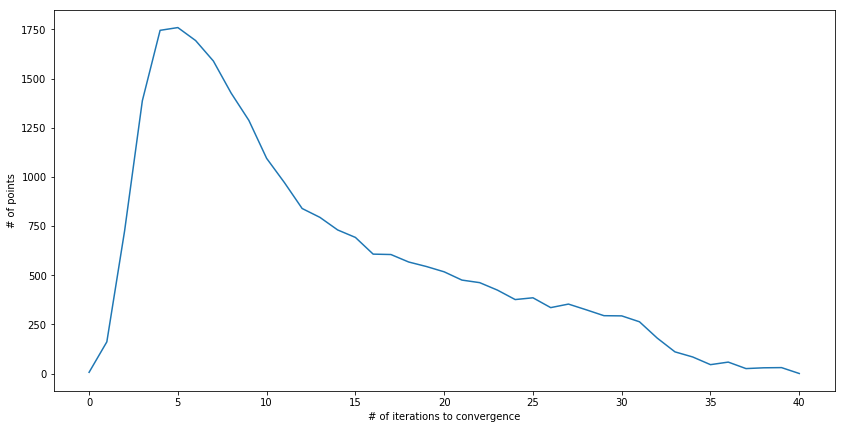

In [10]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi3(z0,5)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(np.maximum(np.minimum((sit-k)*f*c,1),0)) for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newtSteffensen5.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

The larger the value of $\omega$, the larger the regions of convergence are. However, the rate of convergence as we are close to the root is slower. This is because there is more variation in the function when $\omega$ is large

Note that this is just the derivative for the real case:
$$\phi'(z)=1-2\omega*\frac{f'(z)f(z)}{f(z+\omega f(z))-f(z)}+\omega (f(z))^2*\frac{(1+f'(z))f'(f(z)+z)}{(f(z+\omega f(z))-f(z))^2}$$

When, $f(z)$ is close to 0, $\omega f(z)=\varepsilon$ is close to $0$ so this derivative will be close to:
$$1-2\omega*f'(z)*\frac{f(z)}{f(z+\varepsilon)-f(z)}+\omega (f(z))^2*\frac{(1+f'(z))f'(z)}{(f(z+\varepsilon)-f(z))^2}=1-2\omega+\frac{1+f'(z)}{f'(z)^2}=1-2\omega+\frac{1}{f'(z)}\frac{1}{f'(z)^2}$$
The quadratic term explains the quadratic convergence.